In [119]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
#from analysis import download_database
#download_database()

In [160]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


tbl_Schedules <_io.StringIO object at 0x7f7c115a05e0>
tbl_Schedule_Notes <_io.StringIO object at 0x7f7c116bb550>
tbl_Data <_io.StringIO object at 0x7f7c115475e0>
tbl_Version <_io.StringIO object at 0x7f7c115bfa60>
tbl_Zip_Schedule <_io.StringIO object at 0x7f7c11623ee0>
tbl_Zip_Environment <_io.StringIO object at 0x7f7bd0a268b0>


In [126]:
#from plotting import view_all_experiment
#view_all_experiment(data.experiments)

In [174]:
group_experiments = data.get_experiments_per_date('15/01/24')

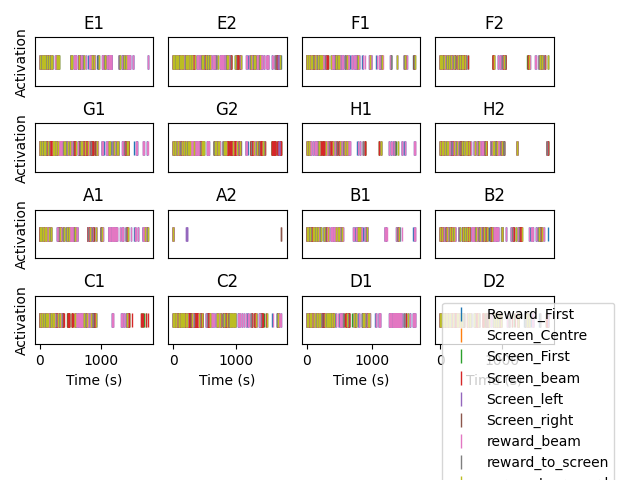

In [215]:
%matplotlib widget
from plotting import display_group_experiments_over_time
display_group_experiments_over_time(group_experiments)

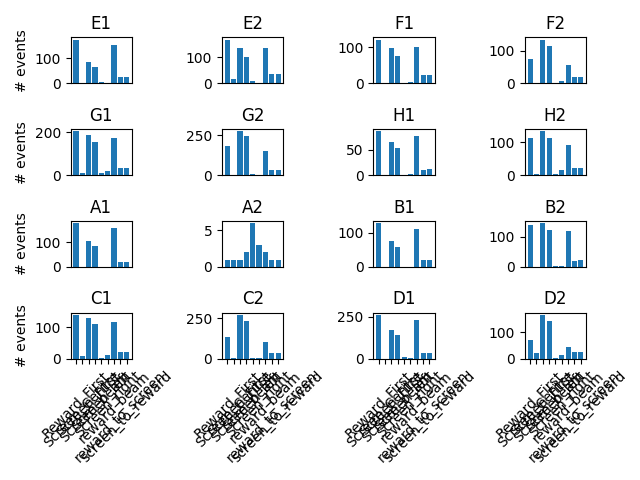

In [214]:
%matplotlib widget
from plotting import display_group_experiments
display_group_experiments(group_experiments)